# Lung deseases data analysis

You'll learn how to analyze sample lung desease data

This demo is a jupyter notebook, i.e. intended to be run step by step.

Author: Eric Einspänner
<br>
Contributor: Nastaran Takmilhomayouni

First version: 6th of July 2023


Copyright 2023 Clinic of Neuroradiology, Magdeburg, Germany

License: Apache-2.0

*This notebook is inspired by: https://www.kaggle.com/code/sbernadac/lung-deseases-data-analysis/notebook*

*Dataset: http://openaccess.thecvf.com/content_cvpr_2017/papers/Wang_ChestX-ray8_Hospital-Scale_Chest_CVPR_2017_paper.pdf*

# Table Of Contents
1. [Intial Set-Up](#Initial-Set-Up)
2. [Data Analysis](#Data-Analysis)
    - [Data cleaning](#Data-cleaning)
    - [Display number of each deseases by patient gender ](#Display-number-of-each-deseases-by-patient-gender)
2. [Age distribution](#Age-distribution)

## Initial Set-Up

In [4]:
# Make sure figures appears inline and animations works
# Edit this to ""%matplotlib notebook" when using the "classic" jupyter notebook interface
%matplotlib widget

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization
import matplotlib.gridspec as gridspec # grid layout to place subplots within a figure.
import matplotlib.ticker as ticker # configuring plot tick locating and formatting
sns.set_style('whitegrid') #  color of the background and whether a grid is enabled

## Data Analysis
To read a csv file you can use read_csv function from python pandas module

In [6]:
# import data set description
df = pd.read_csv('./Data/Data_Entry_2017.csv') # read the csv file from the given location
df.head() # return the first n rows. n=int, default 5

,Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000001_000,Cardiomegaly,0,1,058Y,M,PA,2682,2749,0.143,0.143
1,00000001_001,Cardiomegaly|Emphysema,1,1,058Y,M,PA,2894,2729,0.143,0.143
2,00000001_002,Cardiomegaly|Effusion,2,1,058Y,M,PA,2500,2048,0.168,0.168
3,00000002_000,No Finding,0,2,081Y,M,PA,2500,2048,0.171,0.171
4,00000003_000,Hernia,0,3,081Y,F,PA,2582,2991,0.143,0.143


In [7]:
df.describe() # generate descriptive statistics of quantitative variables

,Follow-up #,Patient ID,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000
mean,8.573751,14346.381743,2646.078844,2486.438842,0.155649,0.155649
std,15.406320,8403.876972,341.246429,401.268227,0.016174,0.016174
min,0.000000,1.000000,1143.000000,966.000000,0.115000,0.115000
25%,0.000000,7310.750000,2500.000000,2048.000000,0.143000,0.143000
50%,3.000000,13993.000000,2518.000000,2544.000000,0.143000,0.143000
75%,10.000000,20673.000000,2992.000000,2991.000000,0.168000,0.168000
max,183.000000,30805.000000,3827.000000,4715.000000,0.198800,0.198800


### Data cleaning
you can select whichever columns you want to work from your dataframe

In [8]:
# drop unused columns
# keep the columns of the dataframe you want
df = df[['Index','Finding Labels','Follow-up #','Patient ID','Patient Age','Patient Gender']]
df.head() # return the first n rows. n=int, default 5

,Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender
0,00000001_000,Cardiomegaly,0,1,058Y,M
1,00000001_001,Cardiomegaly|Emphysema,1,1,058Y,M
2,00000001_002,Cardiomegaly|Effusion,2,1,058Y,M
3,00000002_000,No Finding,0,2,081Y,M
4,00000003_000,Hernia,0,3,081Y,F


In [9]:
# create new columns for each decease
# List of labels you are looking for
pathology_list = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia']

# print all the labels in 'Finding Labels' column of the df
print(df['Finding Labels'])


0                   Cardiomegaly
1         Cardiomegaly|Emphysema
2          Cardiomegaly|Effusion
3                     No Finding
4                         Hernia
                   ...          
112115            Mass|Pneumonia
112116                No Finding
112117                No Finding
112118                No Finding
112119                No Finding
Name: Finding Labels, Length: 112120, dtype: object


you can add column(s) to your dataframe which content can be filled through applying a function on already existing columns of your dataframe

In [10]:
# apply a function on the labels in 'Finding Labels' column of the df
# which adds a column for each pathology and 1 if the pathology is in 'Finding Labels' and 0 if not
for pathology in pathology_list :
    df[pathology] = df['Finding Labels'].apply(lambda x: 1 if pathology in x else 0) #Function to apply to each column or row
    
df.head()

,Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia
0,00000001_000,Cardiomegaly,0,1,058Y,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001,Cardiomegaly|Emphysema,1,1,058Y,M,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,00000001_002,Cardiomegaly|Effusion,2,1,058Y,M,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,00000002_000,No Finding,0,2,081Y,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,00000003_000,Hernia,0,3,081Y,F,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [11]:
print(df.select_dtypes(include=['category']))

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[112120 rows x 0 columns]


### Display number of each deseases by patient gender

In [12]:
df.head()

,Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia
0,00000001_000,Cardiomegaly,0,1,058Y,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001,Cardiomegaly|Emphysema,1,1,058Y,M,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,00000001_002,Cardiomegaly|Effusion,2,1,058Y,M,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,00000002_000,No Finding,0,2,081Y,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,00000003_000,Hernia,0,3,081Y,F,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [13]:
# use melt to transform or reshape data
# investigate only the 'Patient Gender' column of the dataset. How?
# values in the columns in the 'pathology_list' will be printed for each row of'Patient Gender' column
data1=pd.melt(df,id_vars=['Patient Gender'],value_vars = list(pathology_list))
data1

,Patient Gender,variable,value
0,M,Cardiomegaly,1
1,M,Cardiomegaly,1
2,M,Cardiomegaly,1
3,M,Cardiomegaly,0
4,F,Cardiomegaly,0
...,...,...,...
1569675,M,Pneumonia,1
1569676,M,Pneumonia,0
1569677,F,Pneumonia,0
1569678,F,Pneumonia,0


In [14]:
# change the column name 'variable' to 'Category' and 'value' to 'Count'
data1 = pd.melt(df,                             #dataframe
             id_vars=['Patient Gender'],        #columns to keep
             value_vars = list(pathology_list), #variables with values of those columns
             var_name = 'Category',             #change 'variable' name to 'Category'
             value_name = 'Count')              #change 'value'  name to 'Count' 
data1

,Patient Gender,Category,Count
0,M,Cardiomegaly,1
1,M,Cardiomegaly,1
2,M,Cardiomegaly,1
3,M,Cardiomegaly,0
4,F,Cardiomegaly,0
...,...,...,...
1569675,M,Pneumonia,1
1569676,M,Pneumonia,0
1569677,F,Pneumonia,0
1569678,F,Pneumonia,0


In [15]:
# Let's keep only those rows that have Count>0
data1 = data1.loc[data1.Count>0]
data1

,Patient Gender,Category,Count
0,M,Cardiomegaly,1
1,M,Cardiomegaly,1
2,M,Cardiomegaly,1
23,F,Cardiomegaly,1
63,M,Cardiomegaly,1
...,...,...,...
1569117,F,Pneumonia,1
1569187,F,Pneumonia,1
1569327,F,Pneumonia,1
1569405,M,Pneumonia,1


In [16]:
# Let's take a look at the dataframe one more time
# In the 'Finding Labels' column we have 'No Finding' entries
df

,Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia
0,00000001_000,Cardiomegaly,0,1,058Y,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001,Cardiomegaly|Emphysema,1,1,058Y,M,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,00000001_002,Cardiomegaly|Effusion,2,1,058Y,M,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,00000002_000,No Finding,0,2,081Y,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,00000003_000,Hernia,0,3,081Y,F,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001,Mass|Pneumonia,1,30801,039Y,M,0,0,0,0,0,0,0,0,1,0,0,0,0,1
112116,00030802_000,No Finding,0,30802,029Y,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112117,00030803_000,No Finding,0,30803,042Y,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112118,00030804_000,No Finding,0,30804,030Y,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
# Let's create a 'Nothing' column with value 1 if 'No Finding' was in that row of the 'Finding Labels' column  and 0 if not
df['Nothing']=df['Finding Labels'].apply(lambda x: 1 if 'No Finding' in x else 0)
df

,Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,Cardiomegaly,Emphysema,Effusion,Hernia,...,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia,Nothing
0,00000001_000,Cardiomegaly,0,1,058Y,M,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,00000001_001,Cardiomegaly|Emphysema,1,1,058Y,M,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,00000001_002,Cardiomegaly|Effusion,2,1,058Y,M,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,00000002_000,No Finding,0,2,081Y,M,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,00000003_000,Hernia,0,3,081Y,F,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001,Mass|Pneumonia,1,30801,039Y,M,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
112116,00030802_000,No Finding,0,30802,029Y,M,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
112117,00030803_000,No Finding,0,30803,042Y,F,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
112118,00030804_000,No Finding,0,30804,030Y,F,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
# use melt to transform or reshape data
# investigate only the 'Patient Gender' column of the dataset. How?
# values in the 'Nothing' column will be printed for each row of 'Patient Gender' column
# change the column name 'variable' to 'Category' and 'value' to 'Count'
data2 = pd.melt(df,
             id_vars=['Patient Gender'],
             value_vars = list(['Nothing']),
             var_name = 'Category',
             value_name = 'Count')
# Let's keep only those rows that have Count>0
data2 = data2.loc[data2.Count>0]
data2

,Patient Gender,Category,Count
3,M,Nothing,1
13,F,Nothing,1
14,F,Nothing,1
15,F,Nothing,1
16,F,Nothing,1
...,...,...,...
112114,M,Nothing,1
112116,M,Nothing,1
112117,F,Nothing,1
112118,F,Nothing,1


Pathology and Non-pathology counts in female and male cases 

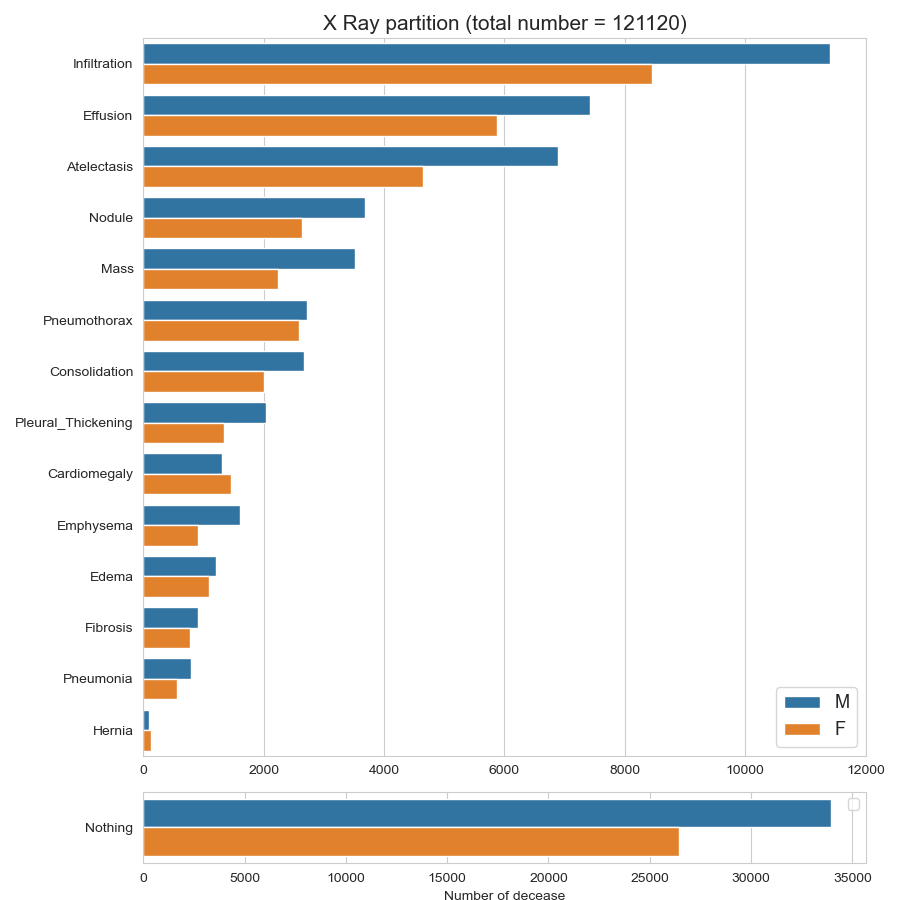

In [19]:
# Let's plot
plt.figure(figsize=(15,10)) # generate a new figure
gs = gridspec.GridSpec(8,1) # create a new grid layout with 8 rows and 1 column
ax1 = plt.subplot(gs[:7, :]) # ax1 to plot the first 7 rows
ax2 = plt.subplot(gs[7, :])  # ax2 to plot the last row
#-------------------------------------------
# Plot 'Cardiomegaly','Emphysema','Effusion','Hernia','Nodule',
#      'Pneumothorax','Atelectasis','Pleural_Thickening','Mass',
#      'Edema','Consolidation','Infiltration','Fibrosis','Pneumonia' counts for male and female

g=sns.countplot(y='Category',hue='Patient Gender',data=data1, ax=ax1, order = data1['Category'].value_counts().index)
ax1.set( ylabel="",xlabel="")
ax1.figure.set_size_inches(9, 9)
ax1.legend(fontsize=13)
ax1.set_title('X Ray partition (total number = 121120)',fontsize=15);
ax1.set_xlim([0,12000])
plt.tight_layout()

# Plot 'Nothing' counts for male and female

g=sns.countplot(y='Category',hue='Patient Gender',data=data2,ax=ax2)
ax2.set( ylabel="",xlabel="Number of decease")
ax2.legend('')
plt.subplots_adjust(hspace=.5)

Patient age counts in female and male cases

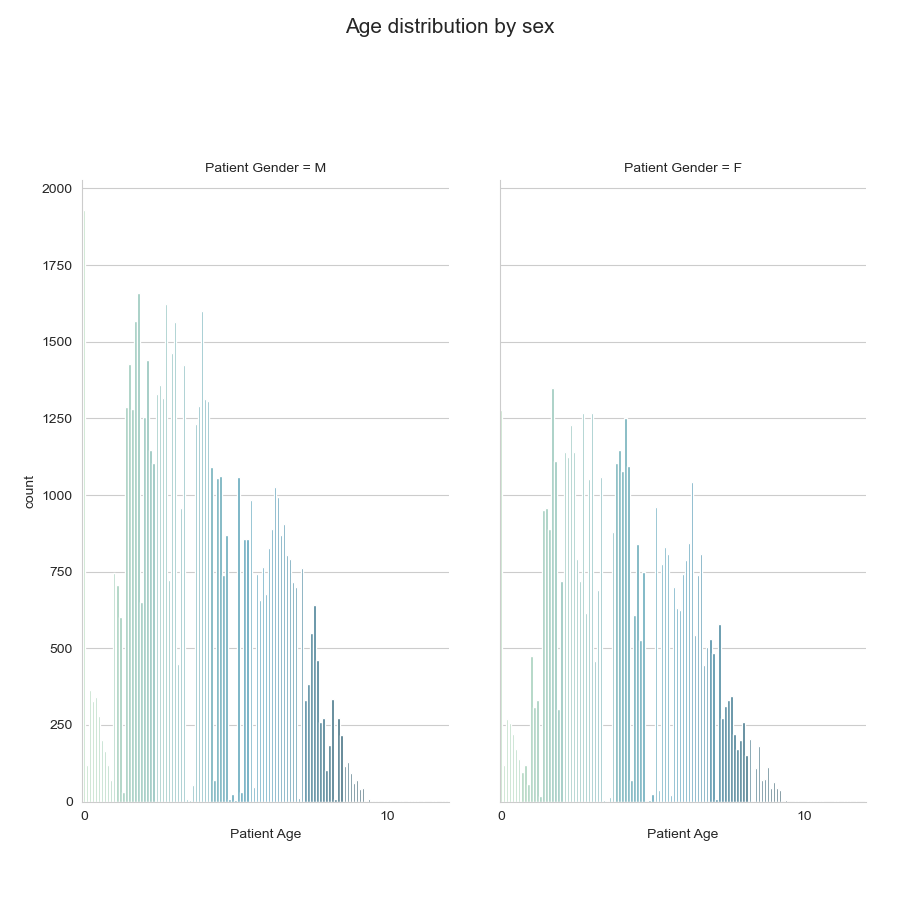

In [23]:
# Let's draw a categorical plot for number of each "Patient Age" value over each "Patient Age" value at ordinal positions
# Do it for each "Patient Gender"
g = sns.catplot(x="Patient Age", col="Patient Gender",data=df, kind="count", aspect=0.8,palette="GnBu_d")
g.set_xticklabels(np.arange(0,121))
g.set_xticklabels(step=10)
g.fig.suptitle('Age distribution by sex',fontsize=15)
g.fig.subplots_adjust(top=.8)
g.figure.set_size_inches(9, 9)

# Age distribution 

In [24]:
# Let's take a look at the dataframe 
df

,Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,Cardiomegaly,Emphysema,Effusion,Hernia,...,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia,Nothing,Age Type
0,00000001_000,Cardiomegaly,0,1,058Y,M,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Y
1,00000001_001,Cardiomegaly|Emphysema,1,1,058Y,M,1,1,0,0,...,0,0,0,0,0,0,0,0,0,Y
2,00000001_002,Cardiomegaly|Effusion,2,1,058Y,M,1,0,1,0,...,0,0,0,0,0,0,0,0,0,Y
3,00000002_000,No Finding,0,2,081Y,M,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Y
4,00000003_000,Hernia,0,3,081Y,F,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001,Mass|Pneumonia,1,30801,039Y,M,0,0,0,0,...,0,0,1,0,0,0,0,1,0,Y
112116,00030802_000,No Finding,0,30802,029Y,M,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Y
112117,00030803_000,No Finding,0,30803,042Y,F,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Y
112118,00030804_000,No Finding,0,30804,030Y,F,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Y


In [25]:
# Let's add 'Age Type' column
df['Age Type']=df['Patient Age'].apply(lambda x: x[-1:]) # keep only the last value Y, M or D
df['Age Type'].unique()  # only keep unique values => Y, M and D
#we mainly have ages expressed in Years, but also a few expressed in Months or in Days
print('age expressed in years',df[df['Age Type']=='Y']['Patient ID'].count())
print('age expressed in months',df[df['Age Type']=='M']['Patient ID'].count())  
print('age expressed in days',df[df['Age Type']=='D']['Patient ID'].count())
df

age expressed in years 112093
age expressed in months 26
age expressed in days 1


,Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,Cardiomegaly,Emphysema,Effusion,Hernia,...,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia,Nothing,Age Type
0,00000001_000,Cardiomegaly,0,1,058Y,M,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Y
1,00000001_001,Cardiomegaly|Emphysema,1,1,058Y,M,1,1,0,0,...,0,0,0,0,0,0,0,0,0,Y
2,00000001_002,Cardiomegaly|Effusion,2,1,058Y,M,1,0,1,0,...,0,0,0,0,0,0,0,0,0,Y
3,00000002_000,No Finding,0,2,081Y,M,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Y
4,00000003_000,Hernia,0,3,081Y,F,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001,Mass|Pneumonia,1,30801,039Y,M,0,0,0,0,...,0,0,1,0,0,0,0,1,0,Y
112116,00030802_000,No Finding,0,30802,029Y,M,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Y
112117,00030803_000,No Finding,0,30803,042Y,F,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Y
112118,00030804_000,No Finding,0,30804,030Y,F,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Y


In [26]:
#we are going to remove character after patients age, and transform D and M in years
df['Age']=df['Patient Age'].apply(lambda x: x[:-1]).astype(int) # keep all before last digits, e.g. 058 and then remove 0 ->58
df

,Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,Cardiomegaly,Emphysema,Effusion,Hernia,...,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia,Nothing,Age Type,Age
0,00000001_000,Cardiomegaly,0,1,058Y,M,1,0,0,0,...,0,0,0,0,0,0,0,0,Y,58
1,00000001_001,Cardiomegaly|Emphysema,1,1,058Y,M,1,1,0,0,...,0,0,0,0,0,0,0,0,Y,58
2,00000001_002,Cardiomegaly|Effusion,2,1,058Y,M,1,0,1,0,...,0,0,0,0,0,0,0,0,Y,58
3,00000002_000,No Finding,0,2,081Y,M,0,0,0,0,...,0,0,0,0,0,0,0,1,Y,81
4,00000003_000,Hernia,0,3,081Y,F,0,0,0,1,...,0,0,0,0,0,0,0,0,Y,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001,Mass|Pneumonia,1,30801,039Y,M,0,0,0,0,...,0,1,0,0,0,0,1,0,Y,39
112116,00030802_000,No Finding,0,30802,029Y,M,0,0,0,0,...,0,0,0,0,0,0,0,1,Y,29
112117,00030803_000,No Finding,0,30803,042Y,F,0,0,0,0,...,0,0,0,0,0,0,0,1,Y,42
112118,00030804_000,No Finding,0,30804,030Y,F,0,0,0,0,...,0,0,0,0,0,0,0,1,Y,30


In [27]:
# convert those age values in 'Age' column that are in months, 'M' or days, 'D' into years, 'Y'

df.loc[df['Age Type']=='M',['Age']] = df[df['Age Type']=='M']['Age'].apply(lambda x: round(x/12.)).astype(int)

df.loc[df['Age Type']=='D',['Age']] = df[df['Age Type']=='D']['Age'].apply(lambda x: round(x/365.)).astype(int)
print(df[df['Age Type']=='D']['Age'])
df[df['Age Type']=='M']['Age']

df['Age'].sort_values(ascending=False).head(20) # sort the age values in an ascending order

df.loc[df['Patient ID']==5567,['Patient Age','Finding Labels','Follow-up #']].sort_values('Follow-up #',ascending=True)
df.loc[df['Patient ID']==5567,['Patient Age','Finding Labels','Follow-up #']].sort_values('Patient Age',ascending=False)
df.head()

94960    0
Name: Age, dtype: int32


,Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,Cardiomegaly,Emphysema,Effusion,Hernia,...,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia,Nothing,Age Type,Age
0,00000001_000,Cardiomegaly,0,1,058Y,M,1,0,0,0,...,0,0,0,0,0,0,0,0,Y,58
1,00000001_001,Cardiomegaly|Emphysema,1,1,058Y,M,1,1,0,0,...,0,0,0,0,0,0,0,0,Y,58
2,00000001_002,Cardiomegaly|Effusion,2,1,058Y,M,1,0,1,0,...,0,0,0,0,0,0,0,0,Y,58
3,00000002_000,No Finding,0,2,081Y,M,0,0,0,0,...,0,0,0,0,0,0,0,1,Y,81
4,00000003_000,Hernia,0,3,081Y,F,0,0,0,1,...,0,0,0,0,0,0,0,0,Y,81


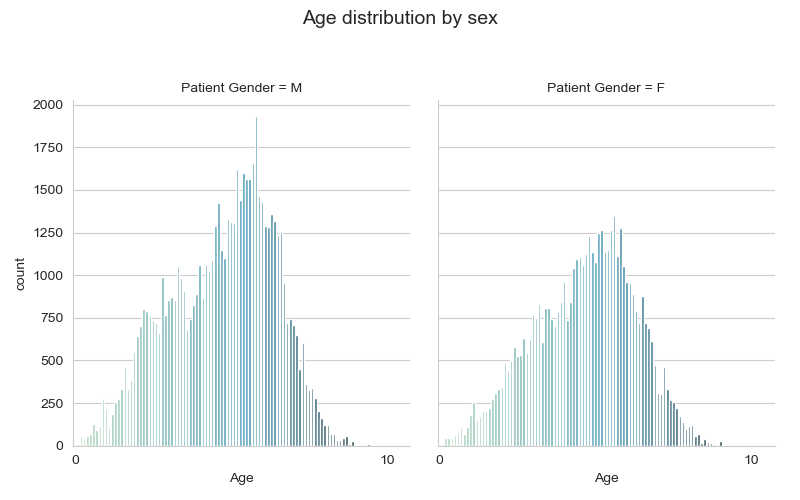

In [28]:
# Let's draw a categorical plot for number of each "Age" value over each "Age" value at ordinal positions
# Do it for each "Patient Gender"
g = sns.catplot(x="Age", col="Patient Gender",data=df, kind="count", aspect=0.8,palette="GnBu_d")
g.set_xticklabels(np.arange(0,108))
g.set_xticklabels(step=10)
g.fig.suptitle('Age distribution by sex',fontsize=14)
g.fig.subplots_adjust(top=.8)

# Distribution looks more realistic now -> Exercise for students: Fix the age column!?

## Display pathologies distribution by age&sex

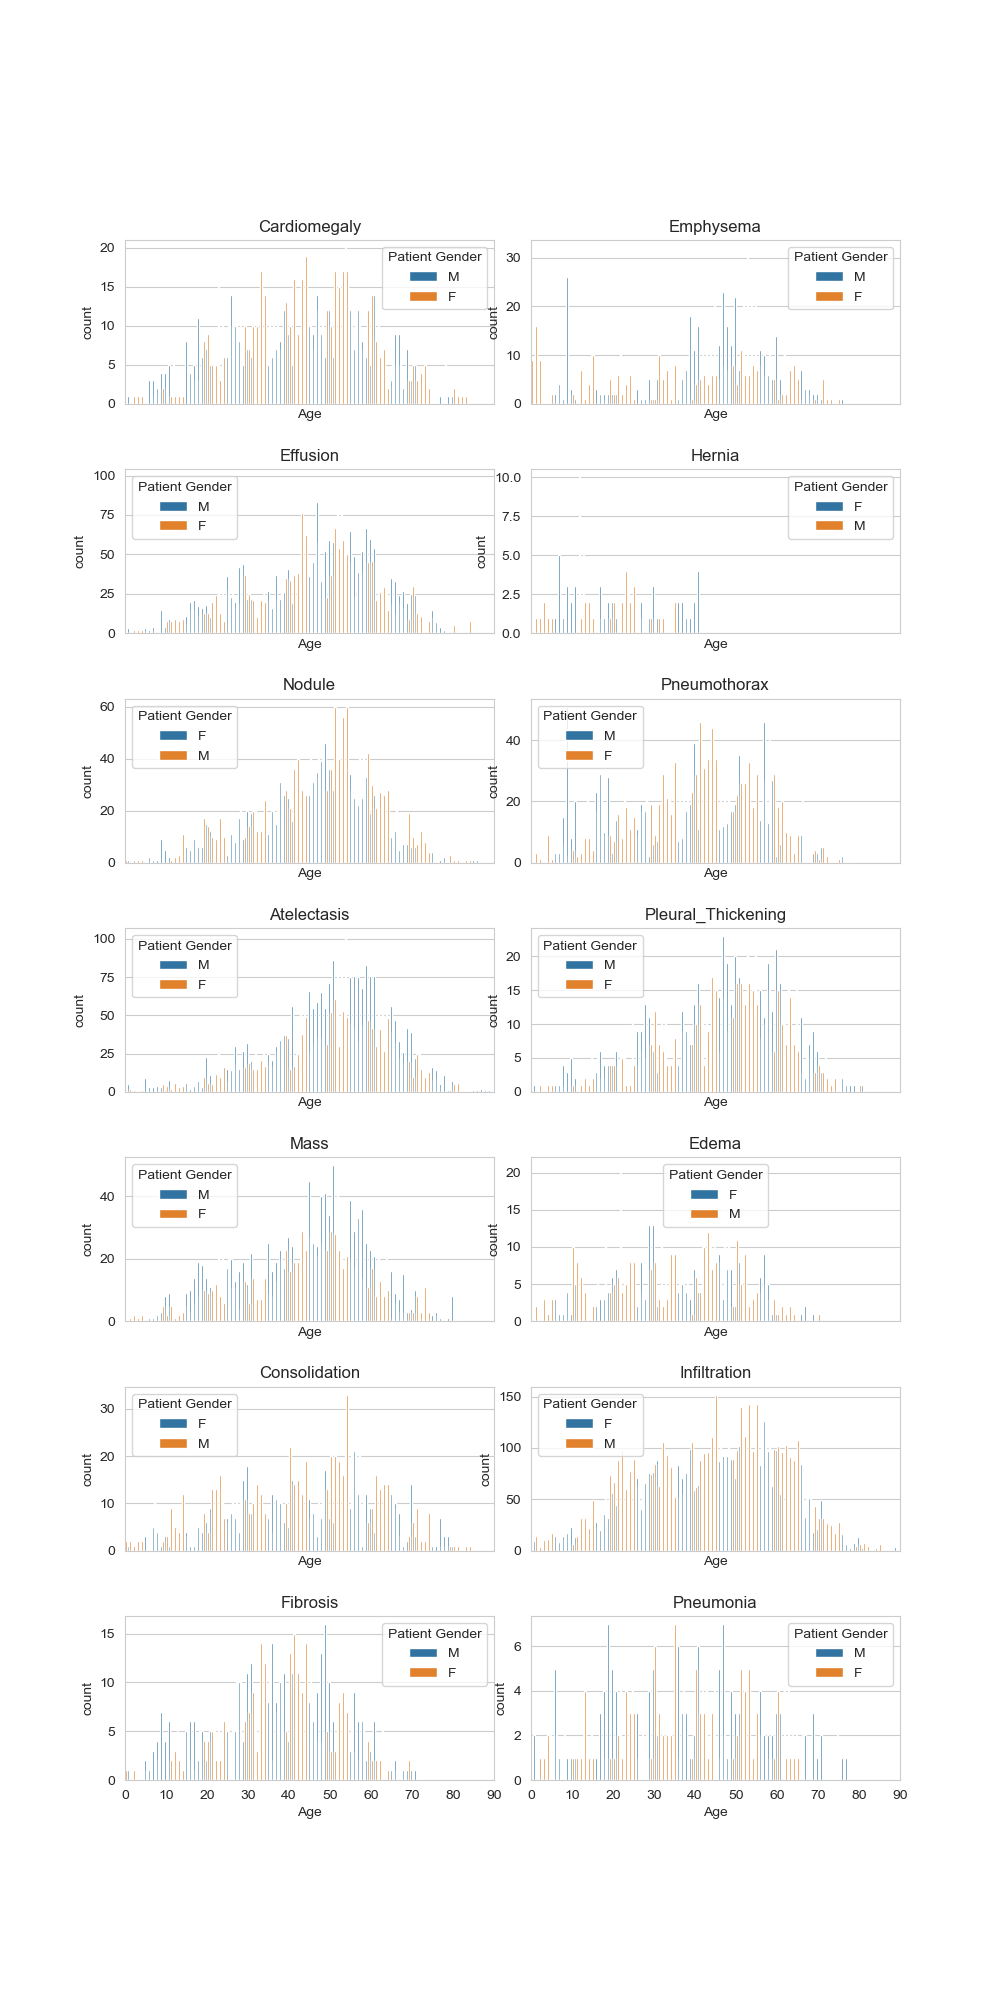

In [29]:
f, axarr = plt.subplots(7, 2, sharex=True,figsize=(10, 20)) # create layout with 7 rows and 2 columns

i=0
j=0
x=np.arange(0,100,10)
for pathology in pathology_list : # Count the occurence of each pathology for each age value for each "Patient Gender"
    g=sns.countplot(x='Age', hue="Patient Gender",data=df[df['Finding Labels']==pathology], ax=axarr[i, j])
    axarr[i, j].set_title(pathology)   
    g.set_xlim(0,90)
    g.set_xticks(x) # use each 'Age' value as ticks
    g.set_xticklabels(x)
    j=(j+1)%2
    if j==0:
        i=(i+1)%7
f.subplots_adjust(hspace=0.4) # height of the padding between subplots for a better view
f.subplots_adjust(wspace=0.1) # width of the padding between subplots for a better view

### Display patient number by Follow-up in details

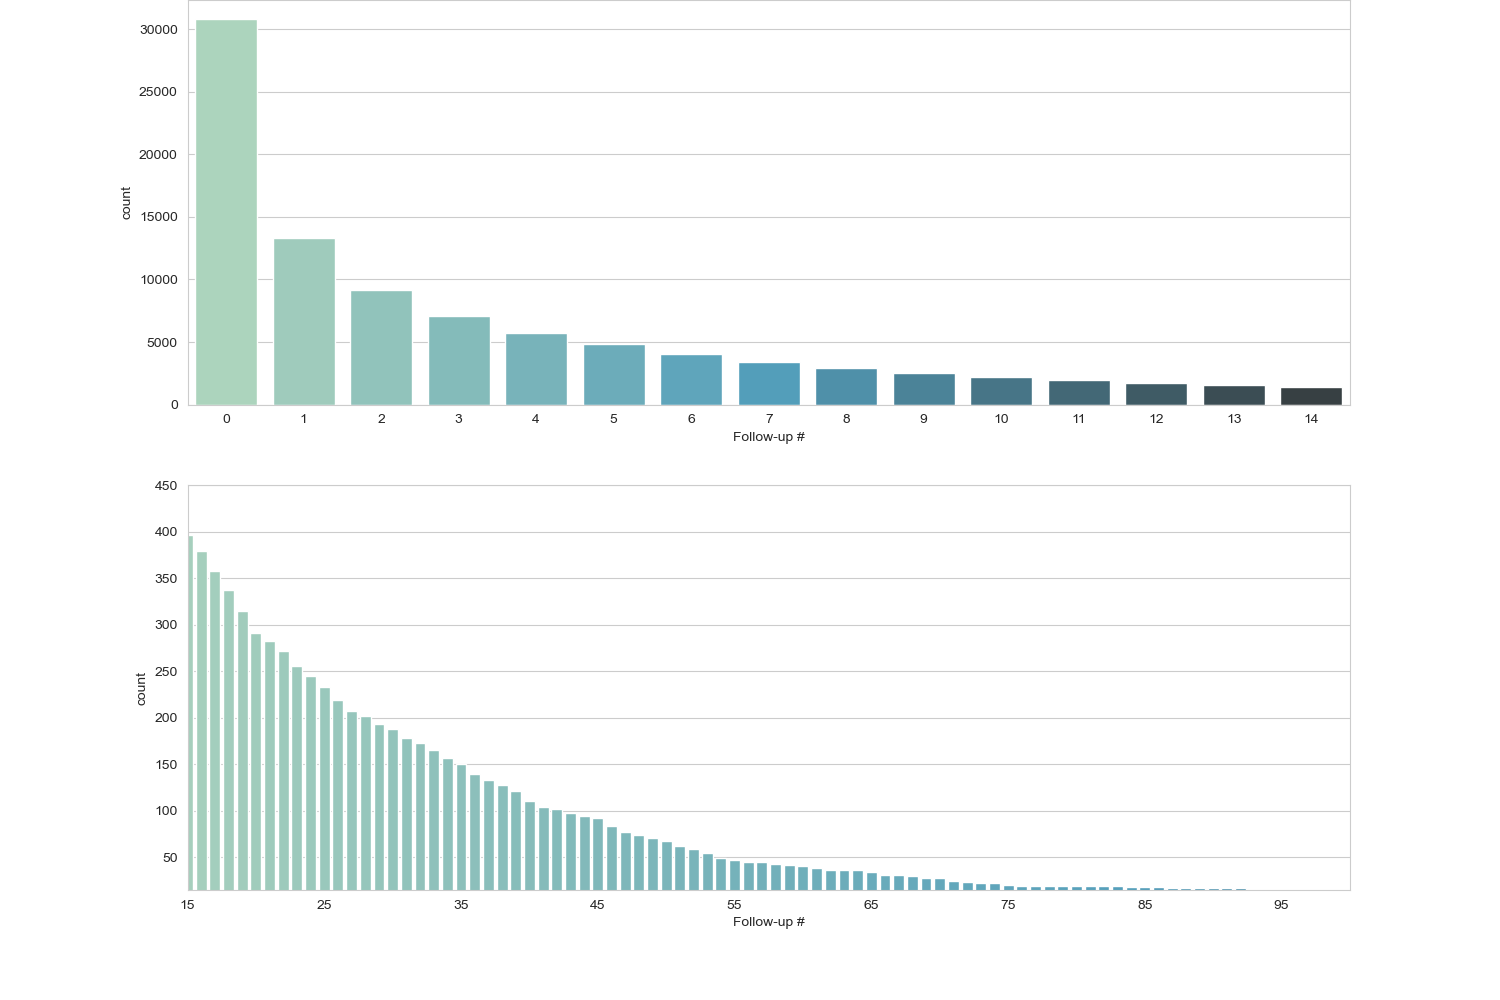

In [30]:
f, (ax1,ax2) = plt.subplots( 2, figsize=(15, 10))

data = df[df['Follow-up #']<15] # get those patient data with less that 15 times 'Follow-up #'

# plot number of patients having each number of 'Follow-up #' in an ordinal distribution
g = sns.countplot(x='Follow-up #',data=data,palette="GnBu_d",ax=ax1); 

ax1.set_title('Follow-up distribution');
data = df[df['Follow-up #']>14] # get those patient data with more  that 15 times 'Follow-up #'


# plot number of patients having each number of 'Follow-up #' in an ordinal distribution
g = sns.countplot(x='Follow-up #',data=data,palette="GnBu_d",ax=ax2);

x=np.arange(15,100,10)
g.set_ylim(15,450)
g.set_xlim(15,100)
g.set_xticks(x)
g.set_xticklabels(x)
f.subplots_adjust(top=1)

## Try to find links between pathologies

In [31]:
# Let's look at the dataframe again
df

,Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,Cardiomegaly,Emphysema,Effusion,Hernia,...,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia,Nothing,Age Type,Age
0,00000001_000,Cardiomegaly,0,1,058Y,M,1,0,0,0,...,0,0,0,0,0,0,0,0,Y,58
1,00000001_001,Cardiomegaly|Emphysema,1,1,058Y,M,1,1,0,0,...,0,0,0,0,0,0,0,0,Y,58
2,00000001_002,Cardiomegaly|Effusion,2,1,058Y,M,1,0,1,0,...,0,0,0,0,0,0,0,0,Y,58
3,00000002_000,No Finding,0,2,081Y,M,0,0,0,0,...,0,0,0,0,0,0,0,1,Y,81
4,00000003_000,Hernia,0,3,081Y,F,0,0,0,1,...,0,0,0,0,0,0,0,0,Y,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001,Mass|Pneumonia,1,30801,039Y,M,0,0,0,0,...,0,1,0,0,0,0,1,0,Y,39
112116,00030802_000,No Finding,0,30802,029Y,M,0,0,0,0,...,0,0,0,0,0,0,0,1,Y,29
112117,00030803_000,No Finding,0,30803,042Y,F,0,0,0,0,...,0,0,0,0,0,0,0,1,Y,42
112118,00030804_000,No Finding,0,30804,030Y,F,0,0,0,0,...,0,0,0,0,0,0,0,1,Y,30


In [13]:
#First display Top 10 multiple deseases
data
data=df.groupby('Finding Labels').count().sort_values('Patient ID',ascending=False).head(23)
data=data[['|' in index for index in data.index.values]]
data

,Index,Follow-up #,Patient ID,Patient Age,Patient Gender,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,...,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia,Nothing,Age Type,Age
Finding Labels,,,,,,,,,,,,,,,,,,,,,
Effusion|Infiltration,1602,1602,1602,1602,1602,1602,1602,1602,1602,1602,...,1602,1602,1602,1602,1602,1602,1602,1602,1602,1602
Atelectasis|Infiltration,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,...,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356
Atelectasis|Effusion,1167,1167,1167,1167,1167,1167,1167,1167,1167,1167,...,1167,1167,1167,1167,1167,1167,1167,1167,1167,1167
Infiltration|Nodule,829,829,829,829,829,829,829,829,829,829,...,829,829,829,829,829,829,829,829,829,829
Atelectasis|Effusion|Infiltration,740,740,740,740,740,740,740,740,740,740,...,740,740,740,740,740,740,740,740,740,740
Cardiomegaly|Effusion,483,483,483,483,483,483,483,483,483,483,...,483,483,483,483,483,483,483,483,483,483
Consolidation|Infiltration,442,442,442,442,442,442,442,442,442,442,...,442,442,442,442,442,442,442,442,442,442
Infiltration|Mass,420,420,420,420,420,420,420,420,420,420,...,420,420,420,420,420,420,420,420,420,420
Effusion|Pneumothorax,405,405,405,405,405,405,405,405,405,405,...,405,405,405,405,405,405,405,405,405,405


In [40]:
# Group dataframe by 'Finding Labels' column and count all the values for each
# sort them based on 'Patient ID' column values in an ascending order
data=df.groupby('Finding Labels').count().sort_values('Patient ID',ascending=False)
data.head()

,Index,Follow-up #,Patient ID,Patient Age,Patient Gender,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,...,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia,Nothing,Age Type,Age
Finding Labels,,,,,,,,,,,,,,,,,,,,,
No Finding,60412,60412,60412,60412,60412,60412,60412,60412,60412,60412,...,60412,60412,60412,60412,60412,60412,60412,60412,60412,60412
Infiltration,9551,9551,9551,9551,9551,9551,9551,9551,9551,9551,...,9551,9551,9551,9551,9551,9551,9551,9551,9551,9551
Atelectasis,4212,4212,4212,4212,4212,4212,4212,4212,4212,4212,...,4212,4212,4212,4212,4212,4212,4212,4212,4212,4212
Effusion,3959,3959,3959,3959,3959,3959,3959,3959,3959,3959,...,3959,3959,3959,3959,3959,3959,3959,3959,3959,3959
Nodule,2706,2706,2706,2706,2706,2706,2706,2706,2706,2706,...,2706,2706,2706,2706,2706,2706,2706,2706,2706,2706


In [41]:
# Some row labels of data contains more than one label separated by a '|'
print(data.index) #The index (row labels) of the DataFrame.

Index(['No Finding', 'Infiltration', 'Atelectasis', 'Effusion', 'Nodule',
       'Pneumothorax', 'Mass', 'Effusion|Infiltration',
       'Atelectasis|Infiltration', 'Consolidation',
       ...
       'Cardiomegaly|Hernia|Infiltration',
       'Cardiomegaly|Fibrosis|Pneumothorax',
       'Cardiomegaly|Effusion|Pleural_Thickening|Pneumothorax',
       'Cardiomegaly|Effusion|Infiltration|Pneumonia',
       'Cardiomegaly|Effusion|Infiltration|Mass|Pneumonia',
       'Cardiomegaly|Effusion|Infiltration|Mass|Nodule|Pleural_Thickening',
       'Cardiomegaly|Effusion|Fibrosis|Mass',
       'Cardiomegaly|Effusion|Emphysema|Infiltration',
       'Cardiomegaly|Effusion|Emphysema|Fibrosis', 'Cardiomegaly|Mass|Nodule'],
      dtype='object', name='Finding Labels', length=790)


In [42]:
df1=data[['|' in index for index in data.index]].copy()  # those rows containing information of many labels

df2=data[['|' not in index for index in data.index]]     # those rows containing information of at least one label
df2=df2[['No Finding' not in index for index in df2.index]] 

df2['Finding Labels']=df2.index.values  # Simple Pathology dataframe 
df1['Finding Labels']=df1.index.values  # Multiple Pathology dataframe

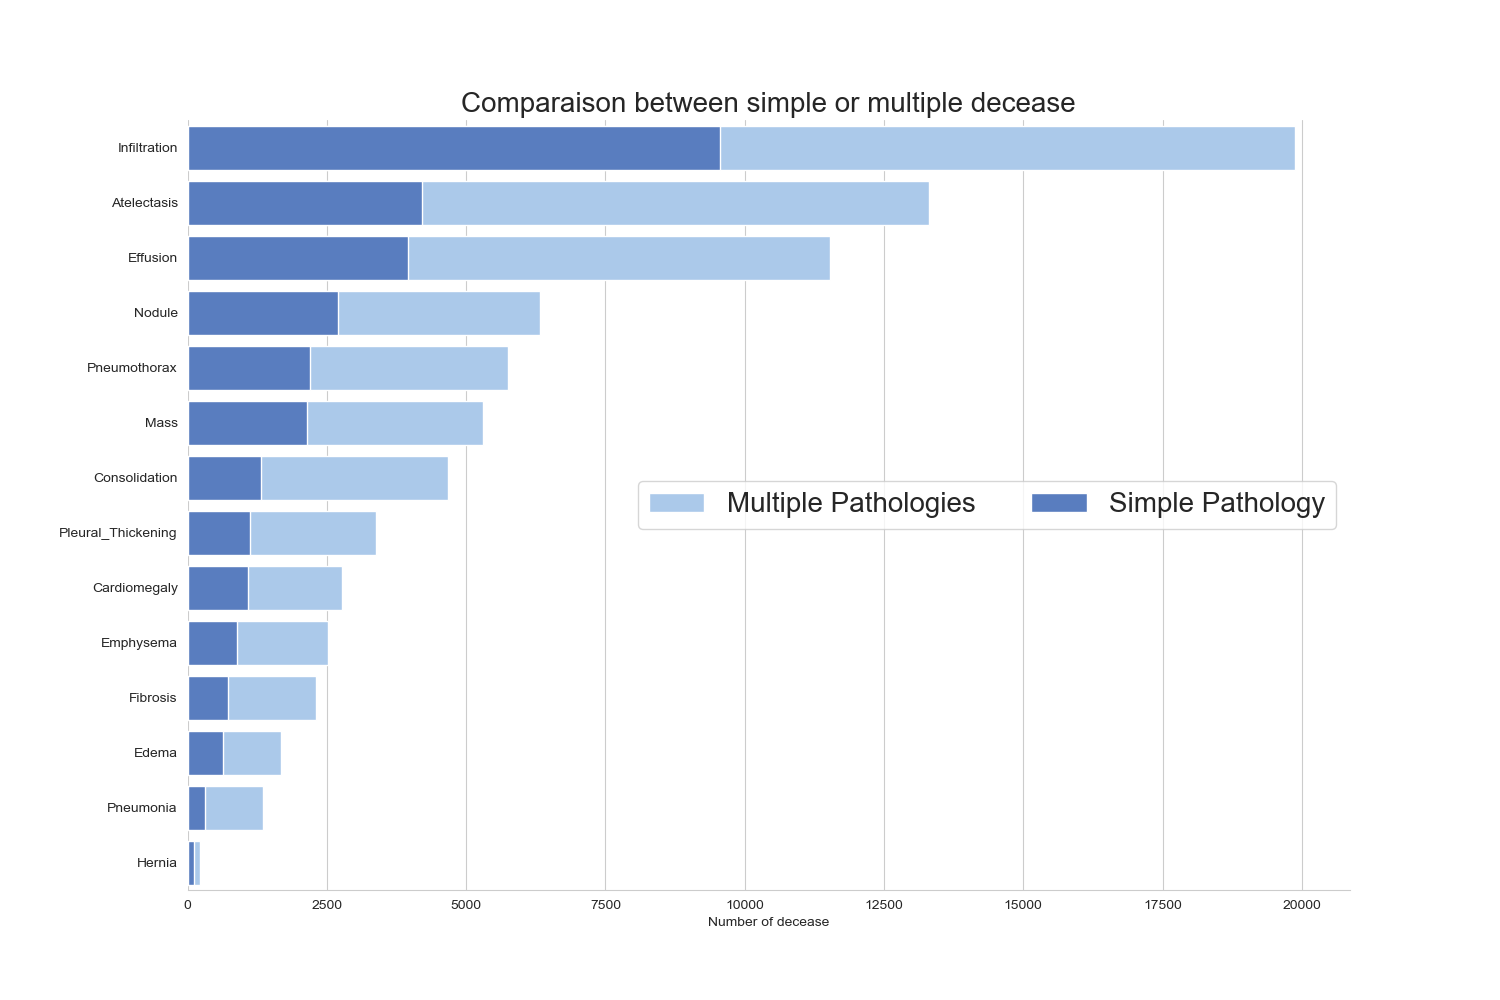

In [43]:
f, ax = plt.subplots(sharex=True,figsize=(15, 10))
sns.set_color_codes("pastel")
g=sns.countplot(y='Category',data=data1, ax=ax, order = data1['Category'].value_counts().index,color='b',label="Multiple Pathologies")
sns.set_color_codes("muted")
g=sns.barplot(x='Patient ID',y='Finding Labels',data=df2, ax=ax, color="b",label="Simple Pathology")
ax.legend(ncol=2, loc="center right", frameon=True,fontsize=20)
ax.set( ylabel="",xlabel="Number of decease")
ax.set_title("Comparaison between simple or multiple decease",fontsize=20)      
sns.despine(left=True)

In [16]:
#we just keep groups of pathologies which appear more than 30 times
df3=df1.loc[df1['Patient ID']>30,['Patient ID','Finding Labels']]

for pathology in pathology_list:
    df3[pathology]=df3.apply(lambda x: x['Patient ID'] if pathology in x['Finding Labels'] else 0, axis=1)

df3.head(20)

,Patient ID,Finding Labels,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia
Finding Labels,,,,,,,,,,,,,,,,
Effusion|Infiltration,1602,Effusion|Infiltration,0,0,1602,0,0,0,0,0,0,0,0,1602,0,0
Atelectasis|Infiltration,1356,Atelectasis|Infiltration,0,0,0,0,0,0,1356,0,0,0,0,1356,0,0
Atelectasis|Effusion,1167,Atelectasis|Effusion,0,0,1167,0,0,0,1167,0,0,0,0,0,0,0
Infiltration|Nodule,829,Infiltration|Nodule,0,0,0,0,829,0,0,0,0,0,0,829,0,0
Atelectasis|Effusion|Infiltration,740,Atelectasis|Effusion|Infiltration,0,0,740,0,0,0,740,0,0,0,0,740,0,0
Cardiomegaly|Effusion,483,Cardiomegaly|Effusion,483,0,483,0,0,0,0,0,0,0,0,0,0,0
Consolidation|Infiltration,442,Consolidation|Infiltration,0,0,0,0,0,0,0,0,0,0,442,442,0,0
Infiltration|Mass,420,Infiltration|Mass,0,0,0,0,0,0,0,0,420,0,0,420,0,0
Effusion|Pneumothorax,405,Effusion|Pneumothorax,0,0,405,0,0,405,0,0,0,0,0,0,0,0


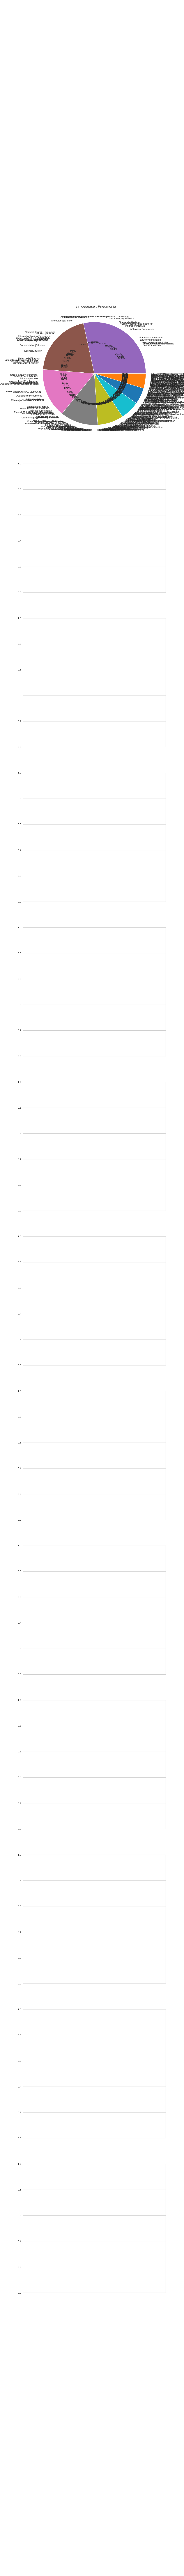

In [17]:
#'Hernia' has not enough values to figure here
df4=df3[df3['Hernia']>0]  # df4.size == 0
#remove 'Hernia' from list
pat_list=[elem for elem in pathology_list if 'Hernia' not in elem]

f, axarr = plt.subplots(13, sharex=True,figsize=(10, 140))
i=0
for pathology in pat_list :
    df4=df3[df3[pathology]>0]
    if df4.size>0:  #'Hernia' has not enough values to figure here
        axarr[i].pie(df4[pathology],labels=df4['Finding Labels'], autopct='%1.1f%%')
        axarr[i].set_title('main desease : '+pathology,fontsize=14)   